In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
from tqdm import trange, notebook

In [2]:
#데이터 크롤링
pre = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=136900&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="

review = []
rate = []

cnt = 0


# for i in range(1,4890, 5): # 약 만개의 데이터

for i in notebook.tqdm(range(1,4980,5)):
    time.sleep(0.1)  # IP가 차단되지 않도록 time.sleep을 통해 쉬어주도록 함
    url = pre + str(i)
    res = requests.get(url)
    soup = BeautifulSoup(res.content,'html.parser')
    
    id_list = []
    id_pre = "_filtered_ment_"

    for i in range(10):
        id_list.append(id_pre+str(i))

    for id in id_list:
        review.append(soup.find("span", {"id":id}).get_text().strip())

        rate_list = []
        rate_list = (soup.select("div.star_score > em"))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)
        
df = pd.DataFrame({"review" : review, "rate" : rate})

  0%|          | 0/996 [00:00<?, ?it/s]

In [3]:
df

,review,rate
0,마블 3000만큼 사랑합니다,10
1,Avengers Assemble!,10
2,I'm Ironman.,10
3,아이언맨으로 시작해서 아이언맨으로 끝난다..,10
4,아스가디언즈 오브 갤럭시 벌써부터 기대됨 ㅋㅋㅋㅋ,10
...,...,...
9955,완전 대박입니다 아이언맨 마지막 장면 최고,10
9956,반가운 얼굴들이 많았고 정말 재밌게 봤습니다,10
9957,미친...했네요 미친했어...,10
9958,인피니티워랑 같이 이어서 보면 좀더 재밌습니다,8


In [4]:
df.to_csv('review.csv') # csv파일로 저장

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec     #gensim install하기
from konlpy.tag import Okt
import numpy as np

train_data = pd.read_csv("review.csv")
train_data[:5] # 상위 5개 출력

,Unnamed: 0,review,rate
0,0,마블 3000만큼 사랑합니다,10
1,1,Avengers Assemble!,10
2,2,I'm Ironman.,10
3,3,아이언맨으로 시작해서 아이언맨으로 끝난다..,10
4,4,아스가디언즈 오브 갤럭시 벌써부터 기대됨 ㅋㅋㅋㅋ,10


In [7]:
#현재 리뷰 분석에서 사용할 형태소 분석기는 konlpy이기 때문에 한글이 아닌 리뷰는 제거시킴
train_data['review'] = train_data['review'].str.replace("[^ㄱ-하-ㅣ가-힣]","") # 한글이 아니면 전부 제거
train_data[:5] # 상위 5개 출력

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_10160/3840387646.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("[^ㄱ-하-ㅣ가-힣]","") # 한글이 아니면 전부 제거


,Unnamed: 0,review,rate
0,0,마블만큼사랑합니다,10
1,1,,10
2,2,,10
3,3,아이언맨으로시작해서아이언맨으로끝난다,10
4,4,아스가디언즈오브갤럭시벌써부터기대됨ㅋㅋㅋㅋ,10


In [8]:
train_data['review'] = train_data['review'].str.replace("ㅋ+","") # ㅋㅋㅋ등의 문자 제거
train_data['review'] = train_data['review'].str.replace("ㅜ+","") # ㅠㅠㅠ등의 문자 제거
train_data['review'] = train_data['review'].str.replace("ㅠ+","") # ㅜㅜㅜ등의 문자 제거
train_data[:5]

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_10160/3231683026.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("ㅋ+","") # ㅋㅋㅋ등의 문자 제거
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_10160/3231683026.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("ㅜ+","") # ㅠㅠㅠ등의 문자 제거
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_10160/3231683026.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("ㅠ+","") # ㅜㅜㅜ등의 문자 제거


,Unnamed: 0,review,rate
0,0,마블만큼사랑합니다,10
1,1,,10
2,2,,10
3,3,아이언맨으로시작해서아이언맨으로끝난다,10
4,4,아스가디언즈오브갤럭시벌써부터기대됨,10


In [9]:
train_data.replace("",np.nan, inplace=True) # 정규식을 통해 공백으로 치환된 데이터를 nan값으로 치환

In [10]:
#결측치 확인 및 제거하기
train_data.isnull().sum()

Unnamed: 0      0
review        363
rate            0
dtype: int64

In [11]:
train_data = train_data.dropna(how='any') # Null값이 존재하는 행 제거
print(train_data.isnull().values.any())  # Null값이 존재하는지 확인

False


In [12]:
train_data.head()

,Unnamed: 0,review,rate
0,0,마블만큼사랑합니다,10
3,3,아이언맨으로시작해서아이언맨으로끝난다,10
4,4,아스가디언즈오브갤럭시벌써부터기대됨,10
5,5,히어로물보고울줄누가알겠습니까,10
6,6,인피니티워가년을무너뜨리는영화라면엔드게임은년을돌아보는영화입니다,10


In [13]:
from tqdm import trange, notebook

# 불용어 지정
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []

#for sentence in train_data['review']:

for sentence in notebook.tqdm(train_data['review']):  # 프로그레스 바
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    temp_X = [word for word in temp_X if len(word) > 1] # 한글자는 제거
    tokenized_data.append(temp_X)


  0%|          | 0/9597 [00:00<?, ?it/s]

In [14]:
tokenized_data

[['마블', '만큼', '사랑'],
 ['아이언맨', '시작', '아이언맨', '끝나다'],
 ['아스', '가디언즈', '오브', '갤럭시', '벌써', '부터', '기대', '되다'],
 ['히어로', '보다', '누가', '알다'],
 ['인피니티', '가년', '무너', '뜨다', '영화', '라면', '엔드게임', '돌아보다', '영화', '이다'],
 ['쥐다', '살리다'],
 ['마지막', '에서', '싸다'],
 ['점안', '주다', '사람', '마블', '에서까지', '밖에', '애정', '없다'],
 ['오랜', '친구', '떠나다', '보내다', '기분', '공허하다', '좌석', '에서', '일어나다', '그리다'],
 ['마블', '시대', '해주다', '감사하다'],
 ['다음', '아이언맨', '아이언맨', '에나', '꼬마', '구나'],
 ['아이언맨', '부터', '사람', '알다', '이영화', '그동안', '모든', '보상', '받다', '영화', '는걸'],
 ['엔드게임', '이라는', '부제', '누가', '붙다', '늘다', '모르다', '진짜', '완벽하다'],
 ['감히', '가평', '가하다', '수준', '영화', '아니다', '다점', '부족하다', '별점', '만큼', '준비', '해주다'],
 ['들쥐', '양자역학', '기계', '버튼', '누르다', '확률', '세상', '살리다', '확률', '크다'],
 ['여자', '틀어막다', '보더', '물론', '나다', '막다'],
 ['쿠키', '없다', '기다리다', '말다'],
 ['어벤져스', '셈블'],
 ['시간', '안양', '터널', '있다', '기분'],
 ['재밌다', '진짜', '재밌다', '개인', '인피니티', '가다', '소름', '돋다'],
 ['아이언맨', '부터', '보다', '사람', '눈물', '나오다'],
 ['보다', '마블', '아니다', '도표', '은합'],
 ['하워드', '포츠', '도분', '좋다', '

리뷰의 최대 길이 : 34
리뷰의 평균 길이 : 6.132228821506721


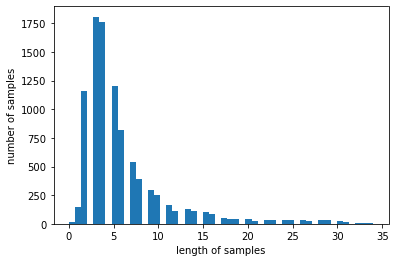

In [15]:
# 리뷰 길이 분포 확인
print("리뷰의 최대 길이 :",max(len(I) for I in tokenized_data))
print("리뷰의 평균 길이 :",sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
#from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1317, 100)

In [19]:
#특정단어 입력 유사도 확인
print(model.wv.most_similar("토니스타크"))
similar_word = model.wv.most_similar("토니스타크")

[('하고', 0.9990090727806091), ('영웅', 0.9989645481109619), ('어벤저스', 0.9989603757858276), ('캐릭터', 0.9989308714866638), ('그리고', 0.998928427696228), ('미치다', 0.9989206790924072), ('느낌', 0.9988860487937927), ('위해', 0.9988825917243958), ('스토리', 0.9988796710968018), ('노스', 0.9988764524459839)]


In [20]:
similar_word_df = pd.DataFrame(similar_word)
similar_word_df.columns=["유사단어","유사도"]
similar_word_df

,유사단어,유사도
0,하고,0.999009
1,영웅,0.998965
2,어벤저스,0.998960
3,캐릭터,0.998931
4,그리고,0.998928
5,미치다,0.998921
6,느낌,0.998886
7,위해,0.998883
8,스토리,0.998880
9,노스,0.998876


In [46]:
#시각화


from gensim.models import Word2Vec

# 형태소 분석 완료
sentences = tokenized_data[:15] # 가시성을 위해 tokenized_data에서 10개의 데이터만 인덱싱하여 사용

# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, vector_size=100, window=3, min_count=1, workers=1)

# 단어 벡터를 구한다.
#word_vectors = model.wv

#vocabs = word_vectors.vocab.keys()    #gensim 4.0부터 vocab.keys()가 index_to_key로 바뀌었음.
vocabs = list(model.wv.index_to_key)
word_vectors_list = [word_vectors[v] for v in vocabs]


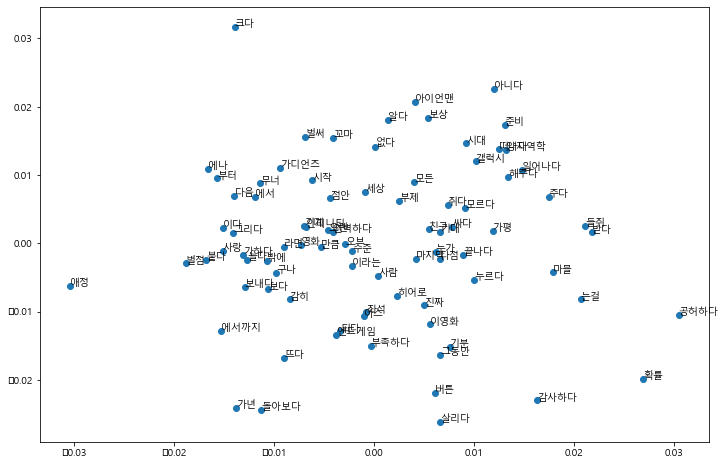

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2개의 차원으로 축소
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

# 단어와 2차원 X축의 값, Y축으로 2차원 그래프를 그린다.
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore') 

plt.rcParams['font.family'] = 'Malgun Gothic' # 인코딩 문제

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, marker = 'o')
for i,v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))